In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from utils.context_data_csv import ContextDataCSV
from utils.matrix_optimizer import MatrixOptimizer
import utils.sulfur.constant as const

from oasis.functions import deconvolve

/app/OASIS/oasis/functions.py:13: UserWarning: Could not find cvxpy. Don't worry, you can still use OASIS, just not the slower interior point methods we compared to in the papers.
  warn("Could not find cvxpy. Don't worry, you can still use OASIS, " +


In [2]:
all_shock_cells = {
    'ID181106CreA': ['C000', 'C007', 'C009', 'C059', 'C076', 'C084', 'C086', 'C099', 'C101', 'C116', 'C120', 'C124', 'C141', 'C143', 'C145', 'C153', 'C164', 'C173', 'C175', 'C197', 'C198', 'C228', 'C234', 'C235', 'C284', 'C303', 'C306', 'C310', 'C317', 'C325', 'C327', 'C328', 'C336', 'C362', 'C377', 'C442', 'C459', 'C476', 'C479', 'C480', 'C487', 'C491', 'C493', 'C494', 'C519'],
    'ID181106CreB': ['C000', 'C003', 'C009', 'C010', 'C063', 'C066', 'C071', 'C072', 'C073', 'C080', 'C083', 'C088', 'C090', 'C094', 'C100', 'C103', 'C108', 'C109', 'C112', 'C114', 'C115', 'C127', 'C130', 'C131', 'C134', 'C166', 'C168', 'C169', 'C177', 'C178', 'C179', 'C200', 'C202', 'C203', 'C213', 'C230', 'C231', 'C268', 'C279', 'C282', 'C284'],
    'ID181106CreC': ['C002', 'C011', 'C012', 'C016', 'C019', 'C043', 'C045', 'C049', 'C050', 'C054', 'C055', 'C056', 'C058', 'C060', 'C063', 'C070', 'C072', 'C074', 'C076', 'C079', 'C084', 'C086', 'C088', 'C096', 'C105', 'C107', 'C118', 'C127', 'C132', 'C143', 'C144', 'C146', 'C153', 'C155', 'C160', 'C168', 'C186', 'C192', 'C193', 'C194', 'C198', 'C202', 'C205', 'C215', 'C219', 'C224', 'C233', 'C235', 'C237', 'C238', 'C239', 'C241', 'C256', 'C257', 'C262', 'C268', 'C272', 'C276', 'C287', 'C294', 'C295', 'C296'],
    'ID181106CreG': ['C003', 'C004', 'C005', 'C010', 'C011', 'C017', 'C025', 'C063', 'C067', 'C070', 'C071', 'C073', 'C076', 'C089', 'C102', 'C118', 'C126', 'C133', 'C136', 'C142', 'C157', 'C166', 'C177', 'C193', 'C197', 'C199', 'C204', 'C205', 'C210', 'C212', 'C229', 'C232', 'C244', 'C247', 'C249', 'C253', 'C261', 'C273', 'C286', 'C291', 'C293', 'C294', 'C298', 'C302', 'C304', 'C305', 'C309', 'C313', 'C325', 'C338', 'C344', 'C352', 'C353', 'C361', 'C377', 'C385', 'C426', 'C449', 'C458', 'C478'],
    'ID181106CreH': ['C018', 'C021', 'C059', 'C074', 'C081', 'C085', 'C087', 'C125', 'C127', 'C148', 'C160', 'C175', 'C203', 'C218', 'C232', 'C249', 'C252', 'C256', 'C261', 'C268', 'C271', 'C350', 'C361', 'C385', 'C386', 'C395', 'C397', 'C400', 'C404', 'C411', 'C475', 'C490', 'C493', 'C497', 'C498', 'C505', 'C511', 'C520', 'C521', 'C525', 'C529', 'C541', 'C579', 'C594', 'C603', 'C632', 'C636'],
    'ID181106CreI': ['C012', 'C049', 'C061', 'C143', 'C164', 'C166', 'C176', 'C183', 'C214', 'C249', 'C254', 'C256', 'C270', 'C275', 'C281', 'C302', 'C325', 'C326', 'C327', 'C341', 'C352', 'C368'],
    'ID181106CreK': ['C006', 'C045', 'C066', 'C071', 'C075', 'C080', 'C085', 'C102', 'C114', 'C117', 'C123', 'C124', 'C133', 'C136', 'C145', 'C178', 'C180', 'C202', 'C205', 'C206', 'C207', 'C208', 'C233', 'C238', 'C239', 'C243', 'C251', 'C262', 'C267', 'C277', 'C291', 'C297', 'C323', 'C325', 'C341', 'C352', 'C361', 'C376', 'C380', 'C399', 'C403', 'C411', 'C424', 'C428'],
    'ID181106CreL': ['C008', 'C015', 'C020', 'C021', 'C037', 'C040', 'C044', 'C049', 'C061', 'C069', 'C073', 'C074', 'C075', 'C082', 'C085', 'C123', 'C125', 'C126', 'C128', 'C129', 'C132', 'C133', 'C144', 'C150', 'C155', 'C162', 'C173', 'C180', 'C185', 'C196', 'C203', 'C209', 'C211', 'C213', 'C216', 'C224', 'C231', 'C236', 'C243', 'C255', 'C270', 'C273', 'C283', 'C298', 'C312', 'C315', 'C323', 'C332', 'C341', 'C343', 'C344', 'C346', 'C350', 'C353', 'C357', 'C373', 'C414', 'C416', 'C424', 'C439', 'C445', 'C456', 'C461', 'C463', 'C475', 'C498', 'C501'],
    'ID181106CreN': ['C008', 'C022', 'C028', 'C044', 'C048', 'C057', 'C062', 'C069', 'C079', 'C089', 'C098', 'C123', 'C144', 'C168', 'C186', 'C201', 'C204', 'C213', 'C217', 'C227', 'C228', 'C239', 'C261', 'C267', 'C288', 'C290', 'C301', 'C306', 'C309', 'C321', 'C343', 'C355', 'C391', 'C395', 'C397', 'C402', 'C404', 'C410', 'C412', 'C413', 'C416', 'C425', 'C429', 'C441', 'C463', 'C469', 'C490', 'C506', 'C511', 'C517'],
    'ID181106CreQ': ['C000', 'C001', 'C006', 'C009', 'C019', 'C022', 'C033', 'C034', 'C040', 'C042', 'C050', 'C055', 'C057', 'C059', 'C061', 'C070', 'C076', 'C089', 'C092', 'C098', 'C108', 'C118', 'C121', 'C122', 'C123', 'C127', 'C132', 'C134', 'C137', 'C168', 'C169', 'C173', 'C179', 'C181', 'C192', 'C202', 'C205', 'C207', 'C209', 'C214', 'C217', 'C239', 'C260', 'C263', 'C281', 'C284', 'C305', 'C308', 'C316', 'C325', 'C332', 'C333', 'C335', 'C336', 'C343', 'C347', 'C354', 'C362', 'C365', 'C368', 'C372', 'C374', 'C375', 'C380', 'C387', 'C398', 'C412', 'C417', 'C421', 'C426', 'C431', 'C434', 'C455', 'C456', 'C463', 'C464', 'C470', 'C485', 'C491']
}

In [3]:
all_event_rate_df = pd.read_csv('./resources/event_rates/oasis_by_cells/all_event_rates_threshold005.csv', index_col=[0], header=[0])
engram_event_rate_df = pd.read_csv('./resources/event_rates/oasis_by_cells/engram_event_rates_threshold005.csv', index_col=[0], header=[0])
non_engram_event_rate_df = pd.read_csv('./resources/event_rates/oasis_by_cells/non_engram_event_rates_threshold005.csv', index_col=[0], header=[0])

In [4]:
index = const.ANIMAL_NAMES
columns = const.CONTEXTS
event_rate_for_2sd_shock_cells = pd.DataFrame(index=index, columns=columns)

for animal_name in const.ANIMAL_NAMES:
    print('animal name: %s' % animal_name)
    
    shock_cells = all_shock_cells[animal_name]
    
    for context_name in const.CONTEXTS:
        print('context: %s' % context_name)
        
        context_data = ContextDataCSV(animal_name, context_name)
        df = context_data.data_frame
        df = MatrixOptimizer(df).divide_sd()
        
        seconds = len(df) / 10.0
        
        event_rates = np.array([])
        shock_cells_df = df.loc[:, shock_cells]
        for cell_name, values in shock_cells_df.iteritems():
            if values.isnull().all() or (values == 0).all():
                print('%s is nan' % cell_name)
                continue
                
            values.fillna(0.0, inplace=True)
            _c, spikes, _b, _g, _lam = deconvolve(values.to_numpy(), g=(None, None), penalty=1)
            
            event_rate = len(spikes[spikes >= 0.05]) / seconds
            event_rates = np.append(event_rates, event_rate)
            
        event_rate_for_2sd_shock_cells.loc[animal_name, context_name] = np.mean(event_rates)
        
event_rate_for_2sd_shock_cells

animal name: ID181106CreA
context: HC1
context: A1preES
context: A1postES
context: HC2
context: HC3
C086 is nan
C099 is nan
C116 is nan
C141 is nan
C143 is nan
C153 is nan
C175 is nan
C228 is nan
C235 is nan
C377 is nan
C442 is nan
C476 is nan
C479 is nan
C494 is nan
context: A2_1
C086 is nan
C099 is nan
C116 is nan
C141 is nan
C143 is nan
C153 is nan
C175 is nan
C228 is nan
C235 is nan
C377 is nan
C442 is nan
C476 is nan
C479 is nan
C494 is nan
context: A2_2
C086 is nan
C099 is nan
C116 is nan
C141 is nan
C143 is nan
C153 is nan
C175 is nan
C228 is nan
C235 is nan
C377 is nan
C442 is nan
C476 is nan
C479 is nan
C494 is nan
context: A3_1
C086 is nan
C099 is nan
C116 is nan
C141 is nan
C143 is nan
C153 is nan
C175 is nan
C228 is nan
C235 is nan
C377 is nan
C442 is nan
C476 is nan
C479 is nan
C494 is nan
context: A3_2
C086 is nan
C099 is nan
C116 is nan
C141 is nan
C143 is nan
C153 is nan
C175 is nan
C228 is nan
C235 is nan
C377 is nan
C442 is nan
C476 is nan
C479 is nan
C494 is nan
cont

C214 is nan
C249 is nan
C256 is nan
C270 is nan
C352 is nan
context: A2_1
C012 is nan
C214 is nan
C249 is nan
C256 is nan
C270 is nan
C352 is nan
context: A2_2
C012 is nan
C214 is nan
C249 is nan
C256 is nan
C270 is nan
C352 is nan
context: A3_1
C012 is nan
C214 is nan
C249 is nan
C256 is nan
C270 is nan
C352 is nan
context: A3_2
C012 is nan
C214 is nan
C249 is nan
C256 is nan
C270 is nan
C352 is nan
context: B1
C012 is nan
C214 is nan
C249 is nan
C256 is nan
C270 is nan
C352 is nan
context: HC4
context: A4preES
context: A4postES
context: HC5
context: HC6
C012 is nan
C049 is nan
C166 is nan
C183 is nan
C214 is nan
C270 is nan
C352 is nan
context: A5
C012 is nan
C049 is nan
C166 is nan
C183 is nan
C214 is nan
C270 is nan
C352 is nan
context: B2
C012 is nan
C049 is nan
C166 is nan
C183 is nan
C214 is nan
C270 is nan
C352 is nan
animal name: ID181106CreK
context: HC1
C428 is nan
context: A1preES
context: A1postES
context: HC2
context: HC3
C136 is nan
C178 is nan
C180 is nan
C206 is nan
C2

,HC1,A1preES,A1postES,HC2,HC3,A2_1,A2_2,A3_1,A3_2,B1,HC4,A4preES,A4postES,HC5,HC6,A5,B2
ID181106CreA,0.652337,0.977259,1.552213,0.604001,0.589226,0.628639,0.953667,0.536807,0.924995,1.035302,0.501228,1.431926,1.52627,0.712893,0.386873,1.450081,0.818046
ID181106CreB,1.112451,1.329837,1.437401,1.272684,0.977701,1.142131,1.403882,1.102776,1.376679,1.186257,0.9804,1.225691,1.405051,0.9382,0.8574,1.444847,1.409064
ID181106CreC,0.894726,1.392097,1.546974,1.038066,0.775406,1.310078,1.361521,1.340335,1.513428,1.202327,0.901088,1.58957,1.867158,1.039465,0.805805,1.462607,1.341306
ID181106CreG,1.188574,1.295167,1.654307,0.912274,1.037946,1.179635,1.318094,1.25607,1.446495,0.92841,0.838708,1.366278,1.638319,0.988787,1.011436,1.618896,1.094788
ID181106CreH,0.351879,0.946738,1.333715,0.728384,0.641585,0.564532,0.939632,0.533237,0.996552,0.829652,0.585986,0.98078,1.390252,0.612003,0.505954,1.060674,0.747832
ID181106CreI,0.534755,1.200909,1.404261,0.958042,0.558613,0.739723,1.232224,0.852042,1.345346,0.824984,0.822408,1.659242,1.416466,1.003661,0.39199,1.441715,0.526826
ID181106CreK,0.935334,1.160303,1.400825,1.34563,0.756495,0.975159,1.266691,1.079578,1.197248,1.201404,0.766329,1.498333,1.641069,1.229542,0.737991,1.41043,1.109536
ID181106CreL,0.68357,1.247065,1.537572,0.94292,0.652949,1.076828,1.140613,1.077575,1.303802,1.223366,0.736838,1.431592,1.496619,0.832914,0.645683,1.213048,1.13674
ID181106CreN,0.811653,1.333533,1.531358,0.86239,0.664165,0.934821,1.121756,0.786908,1.104057,1.276665,0.533322,1.224533,1.769995,0.588476,0.509955,1.45041,1.180751
ID181106CreQ,1.077907,1.443207,1.520488,1.009405,0.868493,1.043997,1.280907,0.986755,1.298178,1.30237,0.916447,1.252996,1.352596,1.039798,0.770396,1.244508,1.033712


<ipython-input-5-0c5fabb16888>:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0].set_xticklabels(x, rotation=45)
<ipython-input-5-0c5fabb16888>:39: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1].set_xticklabels(x, rotation=45)
<ipython-input-5-0c5fabb16888>:50: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[2].set_xticklabels(x, rotation=45)


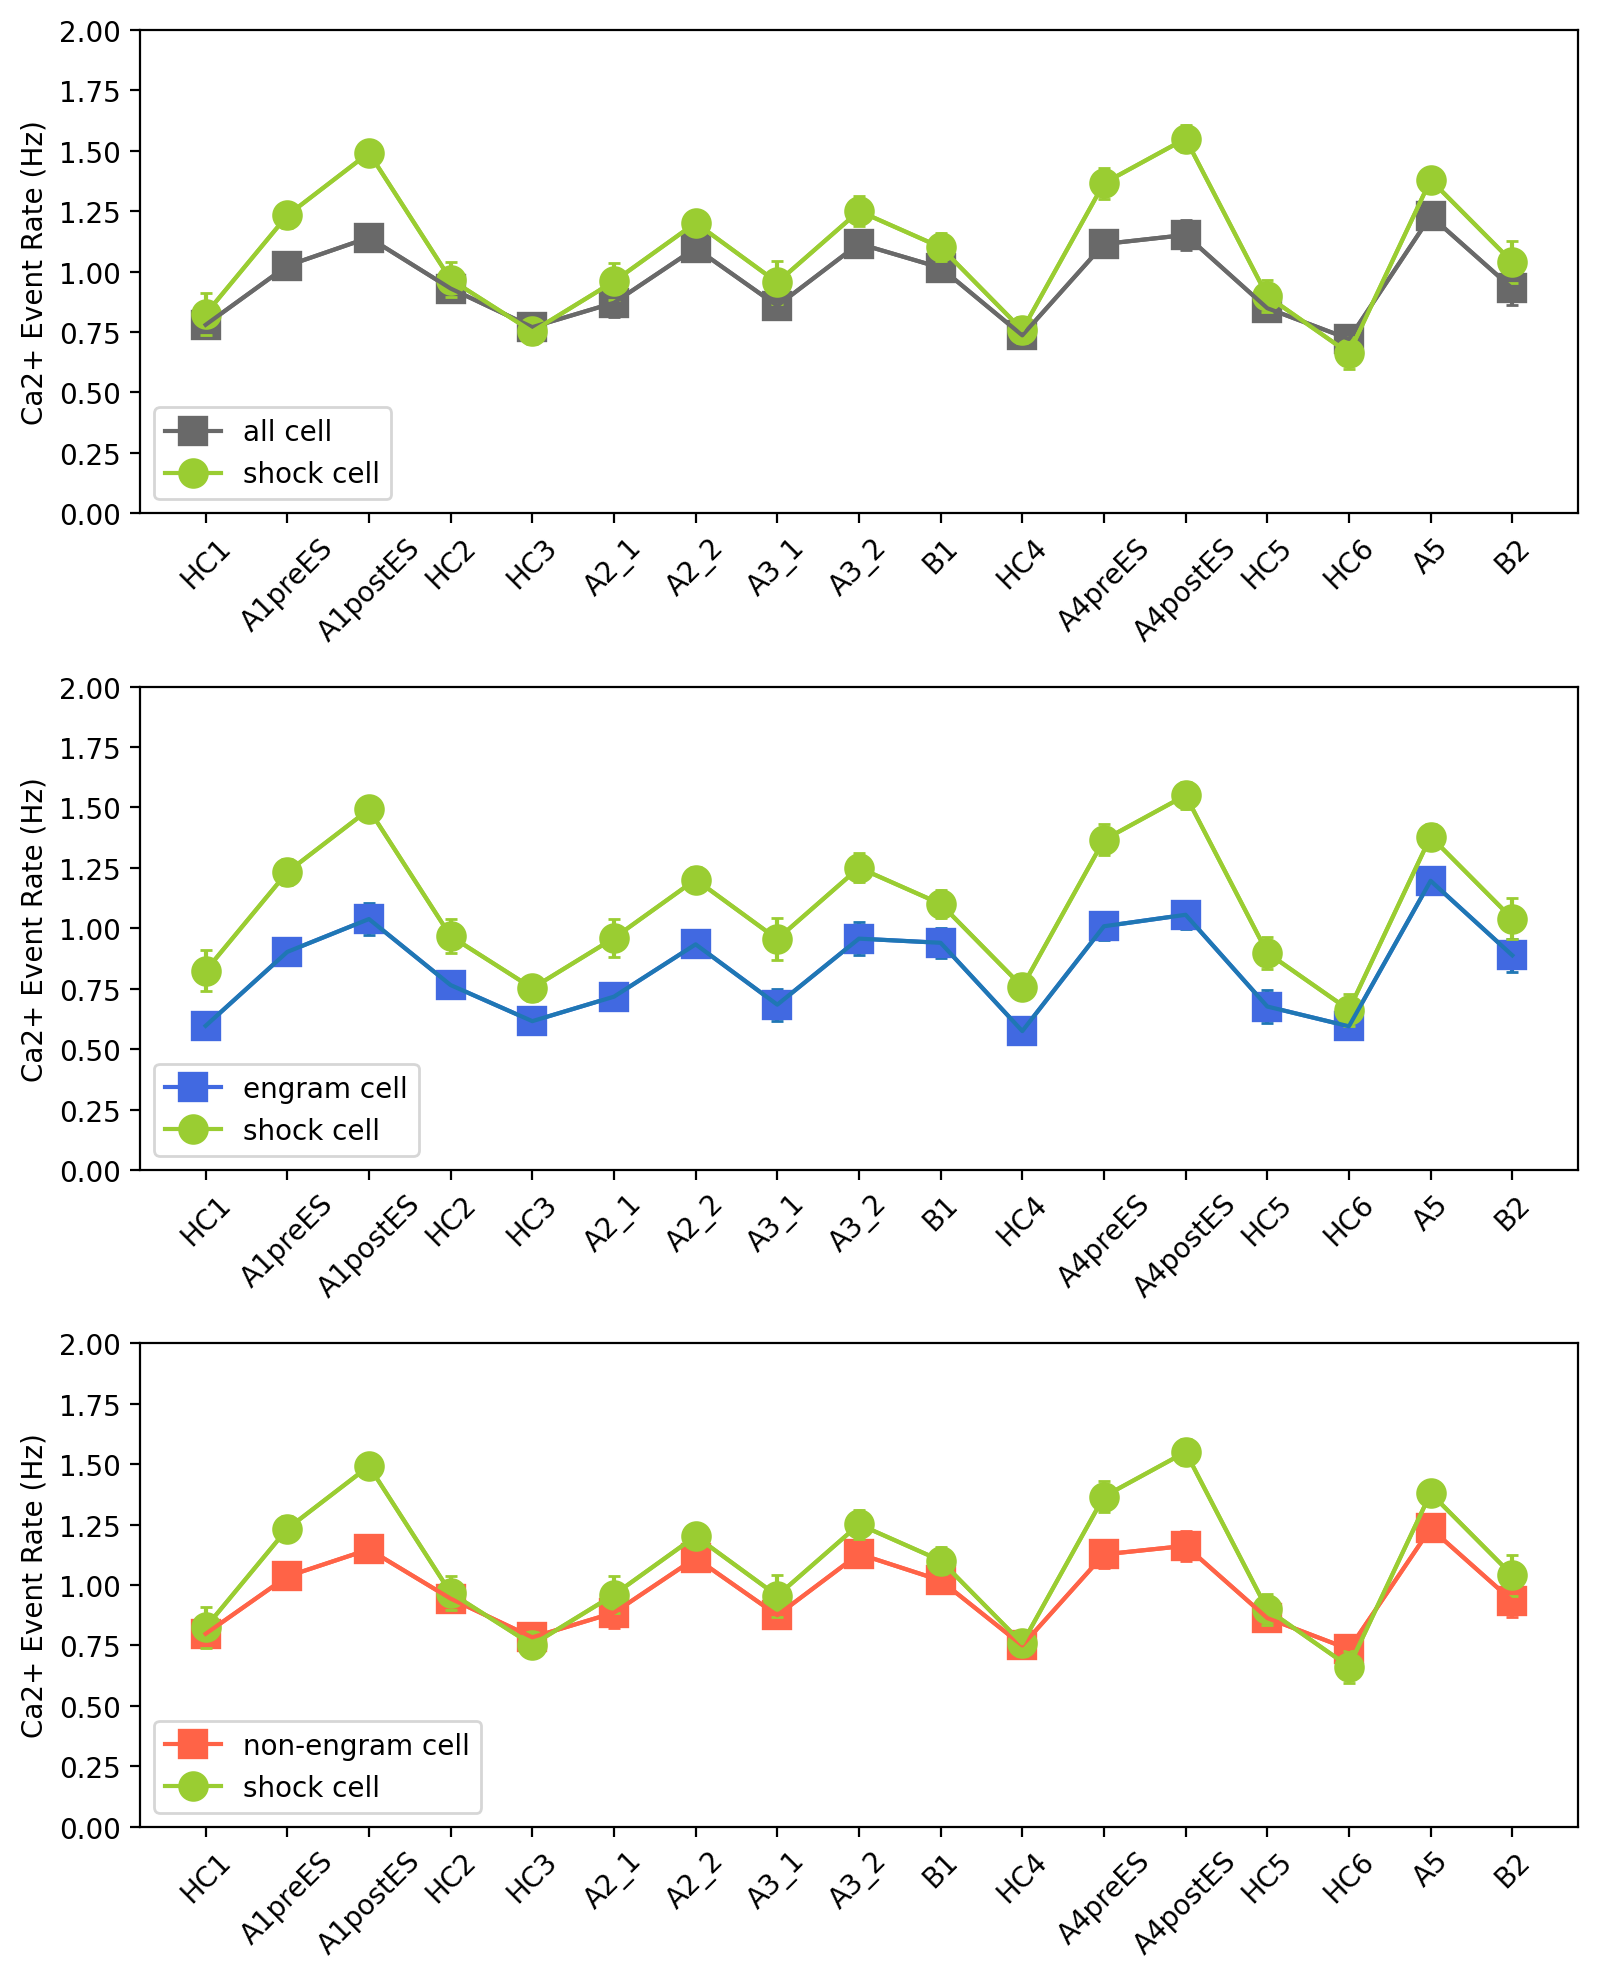

In [5]:
x = all_event_rate_df.columns
y = all_event_rate_df.mean()
error = all_event_rate_df.sem()

engram_x = engram_event_rate_df.columns
engram_y = engram_event_rate_df.mean()
engram_err = engram_event_rate_df.sem()

non_engram_x = non_engram_event_rate_df.columns
non_engram_y = non_engram_event_rate_df.mean()
non_engram_err = non_engram_event_rate_df.sem()

shock_cell_x = event_rate_for_2sd_shock_cells.columns
shock_cell_y = event_rate_for_2sd_shock_cells.mean()
shock_cell_err = event_rate_for_2sd_shock_cells.sem()

fig, axes = plt.subplots(3, figsize=(8, 10), dpi=200, tight_layout=True)

axes[0].errorbar(x, y, yerr=error, capsize=2, color='dimgray')
axes[0].plot(x, y, marker="s", markersize=8, markeredgewidth=3, label='all cell', color='dimgray')

axes[0].errorbar(shock_cell_x, shock_cell_y, yerr=shock_cell_err, capsize=2, color='yellowgreen')
axes[0].plot(shock_cell_x, shock_cell_y, marker="o", markersize=8, markeredgewidth=3, label='shock cell', color='yellowgreen')

axes[0].set_ylim(0, 2.0)
axes[0].set_ylabel('Ca2+ Event Rate (Hz)')
axes[0].legend(loc='lower left')
axes[0].set_xticklabels(x, rotation=45)

axes[1].errorbar(engram_x, engram_y, yerr=engram_err, capsize=2)
axes[1].plot(engram_x, engram_y, marker="s", markersize=8, markeredgewidth=3, label='engram cell', color='royalblue')

axes[1].errorbar(shock_cell_x, shock_cell_y, yerr=shock_cell_err, capsize=2, color='yellowgreen')
axes[1].plot(shock_cell_x, shock_cell_y, marker="o", markersize=8, markeredgewidth=3, label='shock cell', color='yellowgreen')

axes[1].set_ylim(0, 2.0)
axes[1].set_ylabel('Ca2+ Event Rate (Hz)')
axes[1].legend(loc='lower left')
axes[1].set_xticklabels(x, rotation=45)

axes[2].errorbar(non_engram_x, non_engram_y, yerr=non_engram_err, capsize=2, color='tomato')
axes[2].plot(non_engram_x, non_engram_y, marker="s", markersize=8, markeredgewidth=3, label='non-engram cell', color='tomato')

axes[2].errorbar(shock_cell_x, shock_cell_y, yerr=shock_cell_err, capsize=2, color='yellowgreen')
axes[2].plot(shock_cell_x, shock_cell_y, marker="o", markersize=8, markeredgewidth=3, label='shock cell', color='yellowgreen')

axes[2].set_ylim(0, 2.0)
axes[2].set_ylabel('Ca2+ Event Rate (Hz)')
axes[2].legend(loc='lower left')
axes[2].set_xticklabels(x, rotation=45)

plt.xticks(rotation=45)

plt.show()

In [6]:
event_rate_for_2sd_shock_cells.mean()

HC1         0.824319
A1preES     1.232611
A1postES    1.491912
HC2         0.967379
HC3         0.752258
A2_1        0.959554
A2_2        1.201899
A3_1        0.955208
A3_2        1.250678
B1          1.101074
HC4         0.758275
A4preES     1.366094
A4postES    1.550380
HC5         0.898574
HC6         0.662348
A5          1.379722
B2          1.039860
dtype: float64

In [7]:
event_rate_for_2sd_shock_cells.to_csv('./resources/event_rates/oasis_by_cells/2sd_shock_cell_event_rates_with_non-engram.csv')

In [9]:
shock_cell_for_engram = pd.read_csv('./resources/event_rates/oasis_by_cells/2sd_shock_cell_event_rates.csv', index_col=[0], header=[0])

In [10]:
shock_cell_for_engram

,HC1,A1preES,A1postES,HC2,HC3,A2_1,A2_2,A3_1,A3_2,B1,HC4,A4preES,A4postES,HC5,HC6,A5,B2
ID181106CreA,1.397709,1.423333,1.756609,0.666121,0.832923,1.114805,1.548966,0.655913,1.485941,1.565126,0.788672,1.179333,1.901505,0.392799,0.379705,2.258134,1.087050
ID181106CreB,1.380251,1.478889,1.738074,1.160938,0.867572,1.560783,1.575630,1.286546,1.157078,1.308985,1.421167,1.000000,1.871771,1.547989,0.566377,2.488688,1.777634
ID181106CreC,1.092744,1.488333,2.162409,1.172941,0.805174,1.113651,1.395604,1.218510,1.670976,1.197802,0.694490,2.155000,2.086183,1.152755,0.894272,1.984486,1.664512
ID181106CreG,0.816426,1.270476,1.445265,0.379573,0.375900,0.842476,1.186813,0.681688,0.806076,0.873950,0.344924,0.750476,0.916553,0.345392,0.422795,1.634038,0.890202
ID181106CreH,0.634456,1.293667,1.597995,0.543208,1.110820,0.572214,1.240465,0.882612,1.688429,1.123465,0.821084,1.526333,1.574294,0.618759,0.853519,1.717841,1.312756
ID181106CreI,0.823375,0.771429,1.057912,1.568389,0.818003,0.476588,0.921138,0.561442,1.288300,0.881060,1.006711,0.800000,0.938273,0.988237,0.499918,1.021978,0.794441
ID181106CreK,0.873465,1.506667,2.072926,1.659191,0.701424,1.347549,1.216871,1.216476,1.980446,1.209599,0.900491,2.094000,1.445508,1.183633,0.588476,1.325145,0.649644
ID181106CreL,1.400262,0.776667,0.820419,1.546898,NaN,NaN,NaN,NaN,NaN,NaN,1.358651,0.583333,2.101185,1.021277,0.674304,1.302521,0.723982
ID181106CreN,0.886661,1.864167,1.876709,1.514321,0.889944,1.156298,0.567766,0.816297,0.372764,1.000862,1.089198,1.719167,2.212722,0.882305,0.438913,1.797027,1.840659
ID181106CreQ,0.671141,1.253333,1.878705,1.479784,NaN,NaN,NaN,NaN,NaN,NaN,0.494272,1.930000,0.742935,1.412439,0.214403,1.580478,0.465417


In [13]:
shock_cell_for_non_engram = event_rate_for_2sd_shock_cells

In [17]:
a = shock_cell_for_engram.loc[:, ['A1preES', 'A1postES', 'A4preES', 'A4postES', 'A5']]
a.mean()

A1preES     1.312696
A1postES    1.640702
A4preES     1.373764
A4postES    1.579093
A5          1.711034
dtype: float64

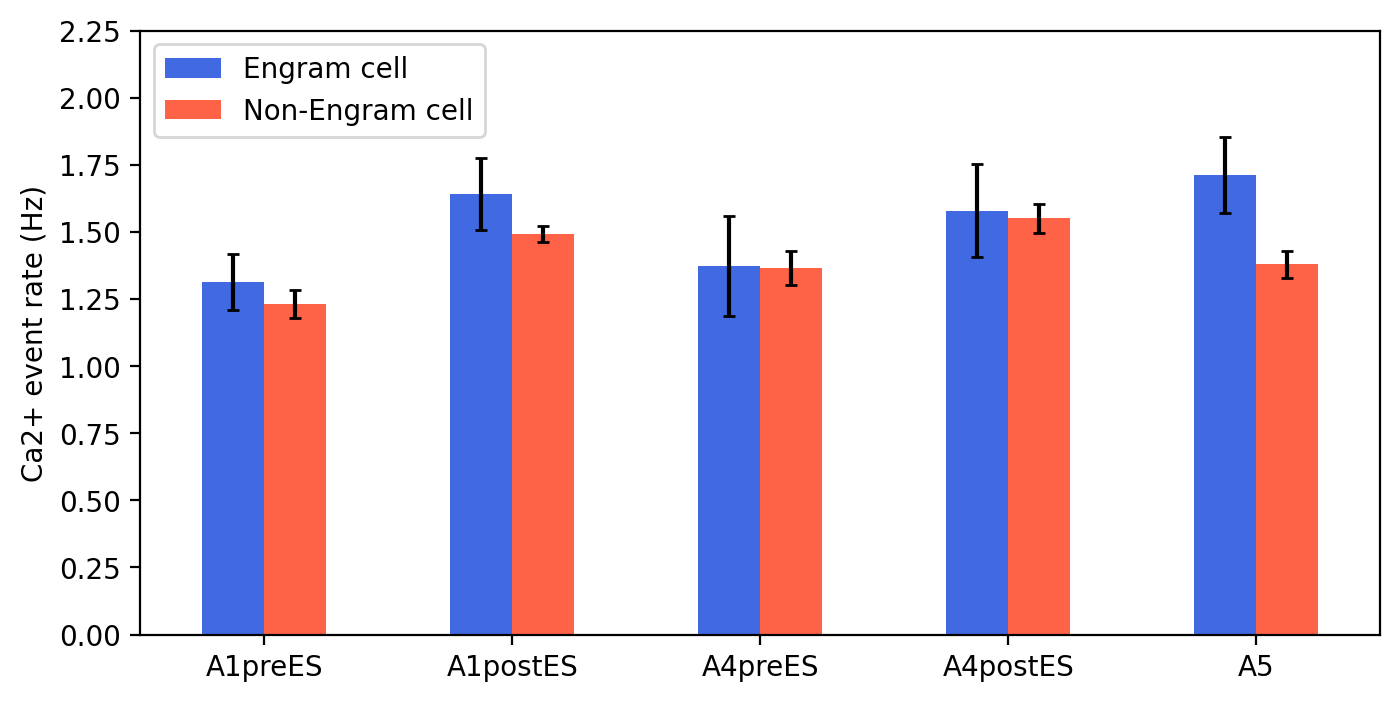

In [65]:
fig, ax = plt.subplots(figsize=(8, 4), dpi=200)

columns = ['A1preES', 'A1postES', 'A4preES', 'A4postES', 'A5']
engram = shock_cell_for_engram.loc[:, columns]
non_engram = shock_cell_for_non_engram.loc[:, columns]

engram_mean, engram_sem = engram.mean(), engram.sem()
non_engram_mean, non_engram_sem = non_engram.mean(), non_engram.sem()

left = np.arange(len(engram_mean))
width = 0.25

ax.bar(x=left - width / 2.0, height=engram_mean, yerr=engram_sem, capsize=2, width=width, label='Engram cell', align='center', color='royalblue')
ax.bar(x=left + width / 2.0, height=non_engram_mean, yerr=non_engram_sem, capsize=2, width=width, label='Non-Engram cell', align='center', color='tomato')
ax.set_xticks(left)
ax.set_xlim(-0.5, 4.5)
ax.set_ylim(0.0, 2.25)
ax.set_xticklabels(labels=columns)
ax.set_ylabel('Ca2+ event rate (Hz)')

ax.legend(loc='upper left')
fig.show()

#### TTEST (pvalue)

A1preES  = 0.507730536  
A1postES = 0.3084491105  
A4preES  = 0.9695094677  
A4postES = 0.8771037625  
A5       = 0.04903328664

<ipython-input-66-b736480771e6>:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x, rotation=45)


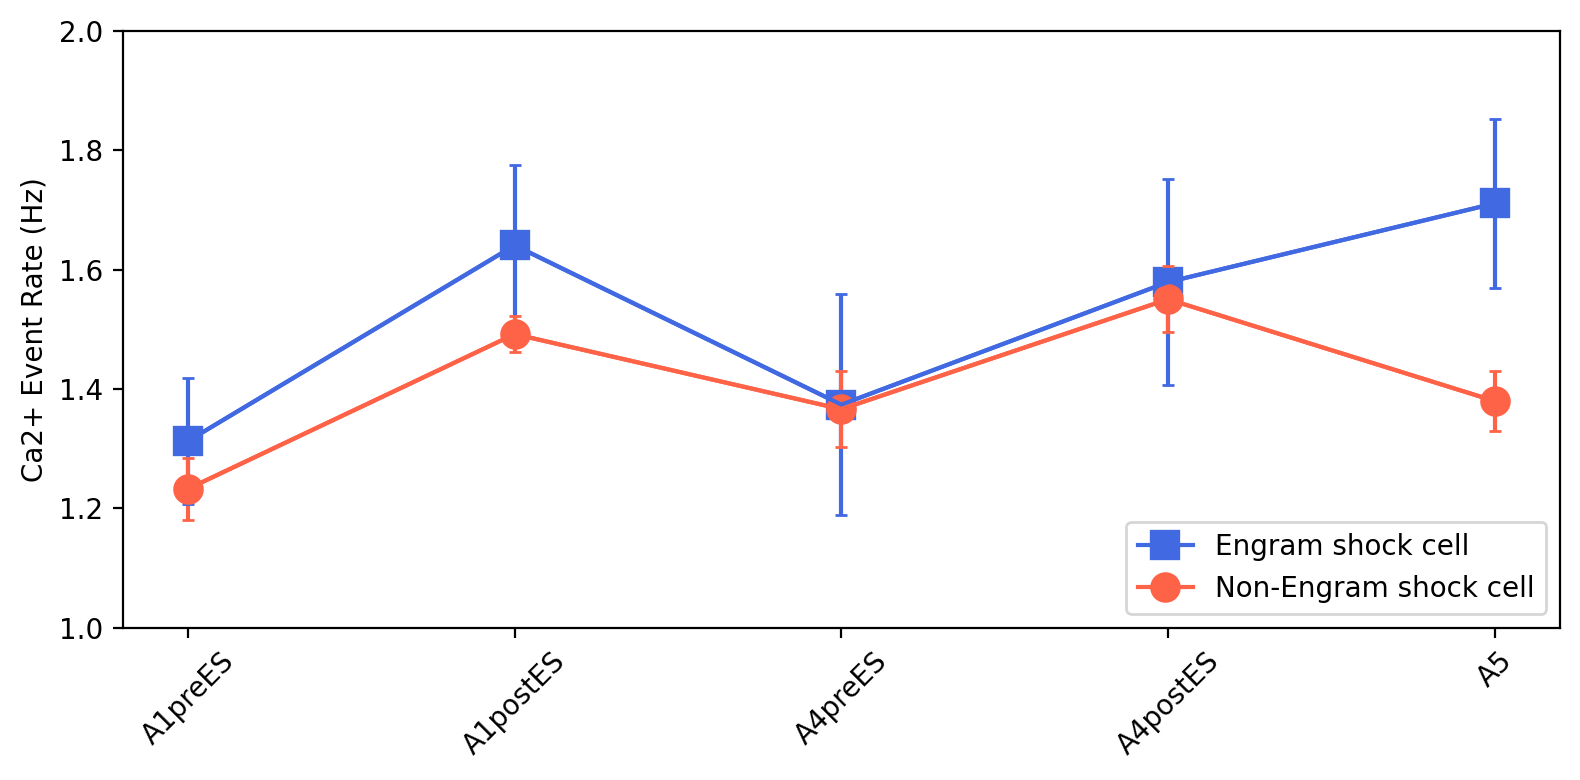

In [66]:
fig, ax = plt.subplots(figsize=(8, 4), dpi=200, tight_layout=True)

x = ['A1preES', 'A1postES', 'A4preES', 'A4postES', 'A5']
engram = shock_cell_for_engram.loc[:, columns]
non_engram = shock_cell_for_non_engram.loc[:, columns]

engram_y, engram_err = engram.mean(), engram.sem()
non_engram_y, non_engram_err = non_engram.mean(), non_engram.sem()

ax.errorbar(x, engram_y, yerr=engram_err, capsize=2, color='royalblue')
ax.plot(x, engram_y, marker="s", markersize=8, markeredgewidth=3, label='Engram shock cell', color='royalblue')

ax.errorbar(x, non_engram_y, yerr=non_engram_err, capsize=2, color='tomato')
ax.plot(x, non_engram_y, marker="o", markersize=8, markeredgewidth=3, label='Non-Engram shock cell', color='tomato')

ax.set_ylim(1.0, 2.0)
ax.set_ylabel('Ca2+ Event Rate (Hz)')
ax.legend(loc='lower left')
ax.set_xticklabels(x, rotation=45)

ax.legend(loc='lower right')
fig.show()